In [1]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
from fastai.vision import *
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def normy(y):
    if y.shape[0] == 1:
        y = (y//255)
    return y

norm_y = TfmPixel(normy)

_tfms = get_transforms()
tfms = [_tfms[0]+[norm_y()], _tfms[1]+[norm_y()]]

In [0]:
data = (SegmentationItemList.from_folder(r'/content/drive/My Drive/Images/Cuboid_Light')
       .split_by_rand_pct()
       .label_from_func(lambda path: path.parent.parent/'Cuboid_White'/f'1{path.stem[1:]}.png', classes=np.array(['Background','Traffic_Light']))
       .transform(tfms, tfm_y=True)
       .databunch(bs=4, path='/content/drive/My Drive/Neural_Network', num_workers=0)
       .normalize(imagenet_stats))

In [5]:
learn = unet_learner(data, models.resnet18, metrics=dice)
learn.fit_one_cycle(3,1e-4)
learn.save('mini_train')
learn.export()

epoch,train_loss,valid_loss,dice,time
0,0.314846,0.038101,0.694480,00:11
1,0.123280,0.011596,0.969011,00:11
2,0.060791,0.005934,0.921654,00:11


In [0]:
def normy(y):
    if y.shape[0] == 1:
        y = (y//255)
    return y

yeet = load_learner('/content/drive/My Drive/Neural_Network')

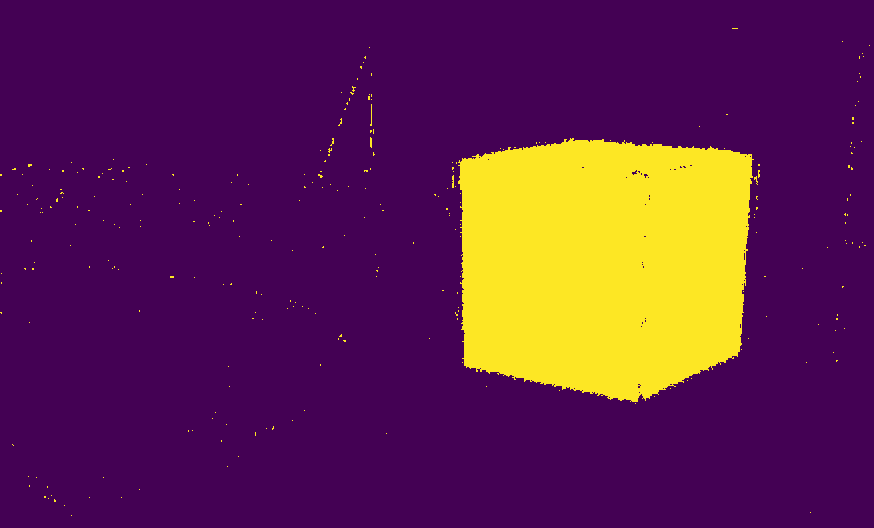

In [7]:
image = open_image('/content/drive/My Drive/screenshot.png')
yeet.predict(image)[0]

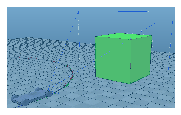

In [8]:
image.show(y = yeet.predict(image)[0])

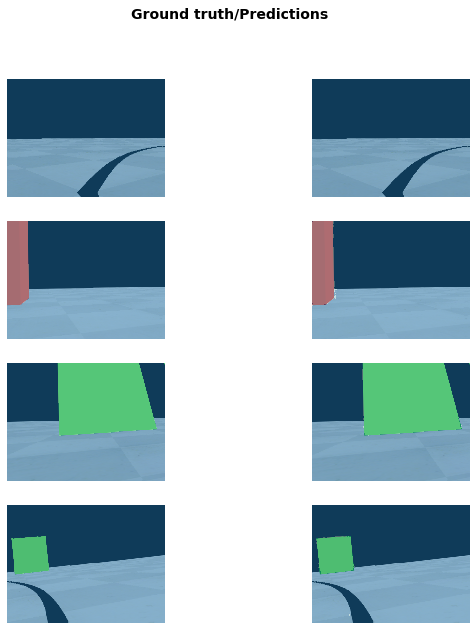

In [9]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(10,10))